In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

plt.style.use("ggplot")
# os 환경에 맞게 Choose
matplotlib.rcParams['font.family'] = 'NanumGothicCoding'
#matplotlib.rcParams['font.family'] = 'AppleG1othic'

matplotlib.rcParams['axes.unicode_minus'] =False
plt.rcParams['figure.figsize'] = [20,20]
plt.rcParams['font.size'] = 30.0
import warnings
warnings.filterwarnings(action='ignore')
 
%load_ext autotime


In [43]:
csv_l = glob.glob('/STORAGE/ESS/01_DATA/PC_Data/DATA_SERVER/*')


In [44]:
csv_l

['/STORAGE/ESS/01_DATA/PC_Data/DATA_SERVER/20230619_16_hw_idle_info.txt',
 '/STORAGE/ESS/01_DATA/PC_Data/DATA_SERVER/20230620_07_hw_idle_info.txt',
 '/STORAGE/ESS/01_DATA/PC_Data/DATA_SERVER/20230619_18_hw_idle_info.txt',
 '/STORAGE/ESS/01_DATA/PC_Data/DATA_SERVER/20230619_15_hw_idle_info.txt',
 '/STORAGE/ESS/01_DATA/PC_Data/DATA_SERVER/20230620_14_hw_idle_info.txt',
 '/STORAGE/ESS/01_DATA/PC_Data/DATA_SERVER/20230619_14_hw_idle_info.txt',
 '/STORAGE/ESS/01_DATA/PC_Data/DATA_SERVER/20230620_09_hw_idle_info.txt',
 '/STORAGE/ESS/01_DATA/PC_Data/DATA_SERVER/20230619_19_hw_idle_info.txt',
 '/STORAGE/ESS/01_DATA/PC_Data/DATA_SERVER/20230619_17_hw_idle_info.txt',
 '/STORAGE/ESS/01_DATA/PC_Data/DATA_SERVER/20230620_06_hw_idle_info.txt',
 '/STORAGE/ESS/01_DATA/PC_Data/DATA_SERVER/20230620_15_hw_idle_info.txt',
 '/STORAGE/ESS/01_DATA/PC_Data/DATA_SERVER/20230619_12_hw_idle_info.txt',
 '/STORAGE/ESS/01_DATA/PC_Data/DATA_SERVER/20230619_21_hw_idle_info.txt',
 '/STORAGE/ESS/01_DATA/PC_Data/DATA_SE

In [45]:
df = pd.DataFrame()
for nme in csv_l:
    tmp = pd.read_csv(nme,header=None)
    
    df = pd.concat([df,tmp])
    
df

,0,1,2
0,20230619_160000.136731,4.6,76.3
1,20230619_160000.237035,4.2,76.3
2,20230619_160000.337356,4.6,76.3
3,20230619_160000.437639,4.2,76.3
4,20230619_160000.537920,4.2,76.3
...,...,...,...
35545,20230620_015959.666231,0.4,74.0
35546,20230620_015959.767550,0.8,74.0
35547,20230620_015959.868877,0.8,74.0
35548,20230620_015959.970205,0.8,74.0


In [46]:
df = df.rename(columns= {
    0:'time',
    1:'CPU',
    2:'MEMORY'
                   })
df = df[df.time != 'time']
df = df.astype({'CPU':float,
          'MEMORY':float})

In [47]:
df.time = df.time.apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d_%H%M%S.%f'))

In [48]:
df = df.set_index('time')
df.sort_index(inplace=True)

In [49]:
df

,CPU,MEMORY
time,,
2023-06-19 12:46:24.783196,1.7,72.3
2023-06-19 12:46:24.884417,2.5,72.3
2023-06-19 12:46:24.985656,2.9,72.3
2023-06-19 12:46:25.086937,2.1,72.3
2023-06-19 12:46:25.188187,2.9,72.3
...,...,...
2023-06-20 20:59:59.594952,0.8,75.6
2023-06-20 20:59:59.696203,0.0,75.6
2023-06-20 20:59:59.797473,0.8,75.6


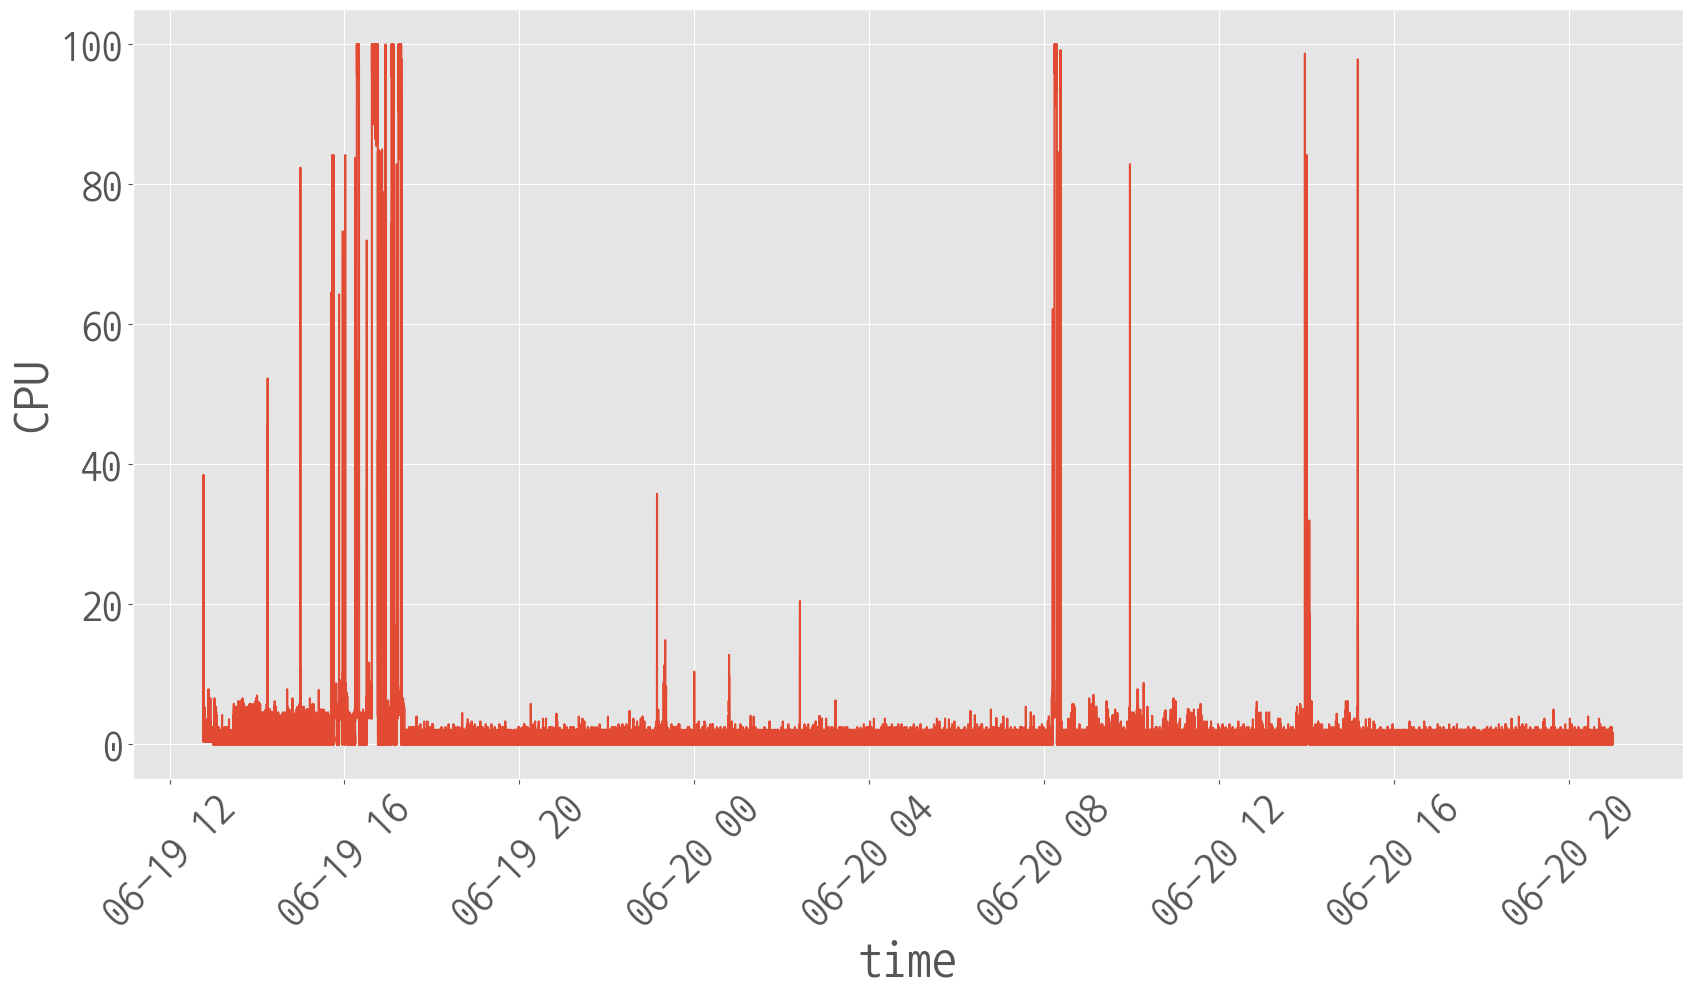

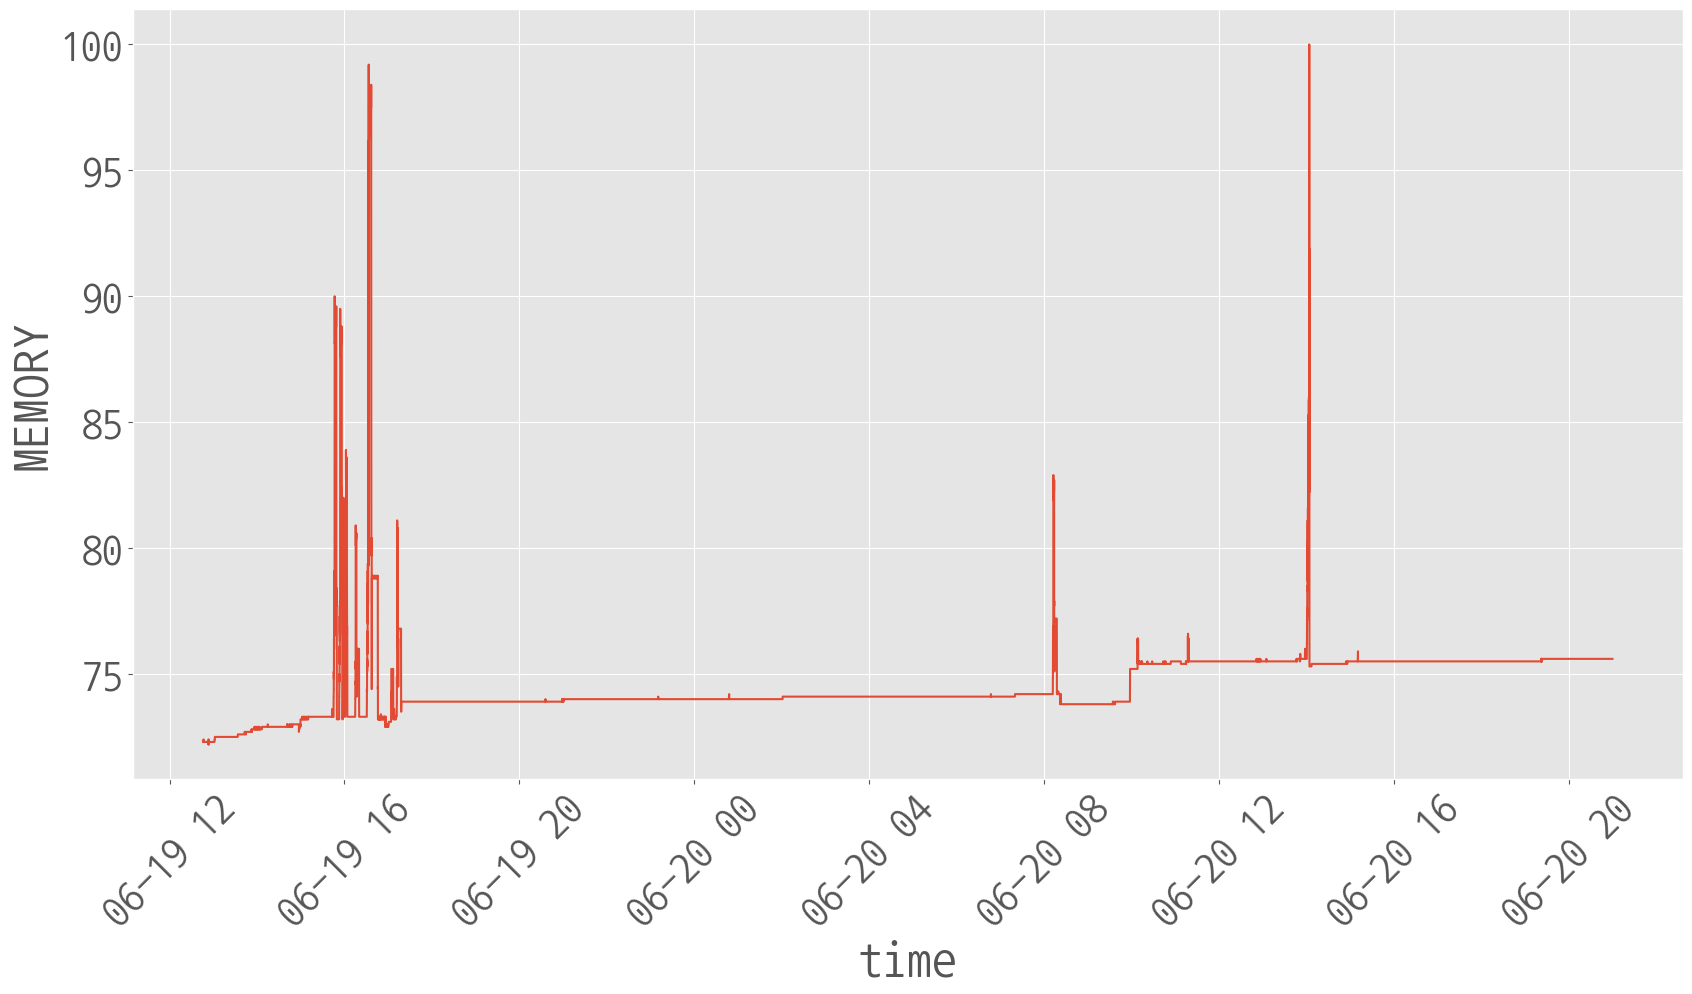

In [54]:
plt.figure(figsize = (20,10))
sns.lineplot(data = df, x= df.index, y = 'CPU')
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize = (20,10))
sns.lineplot(data = df, x= df.index, y = 'MEMORY')
plt.xticks(rotation = 45)
plt.show()

<Axes: xlabel='MEMORY', ylabel='Density'>

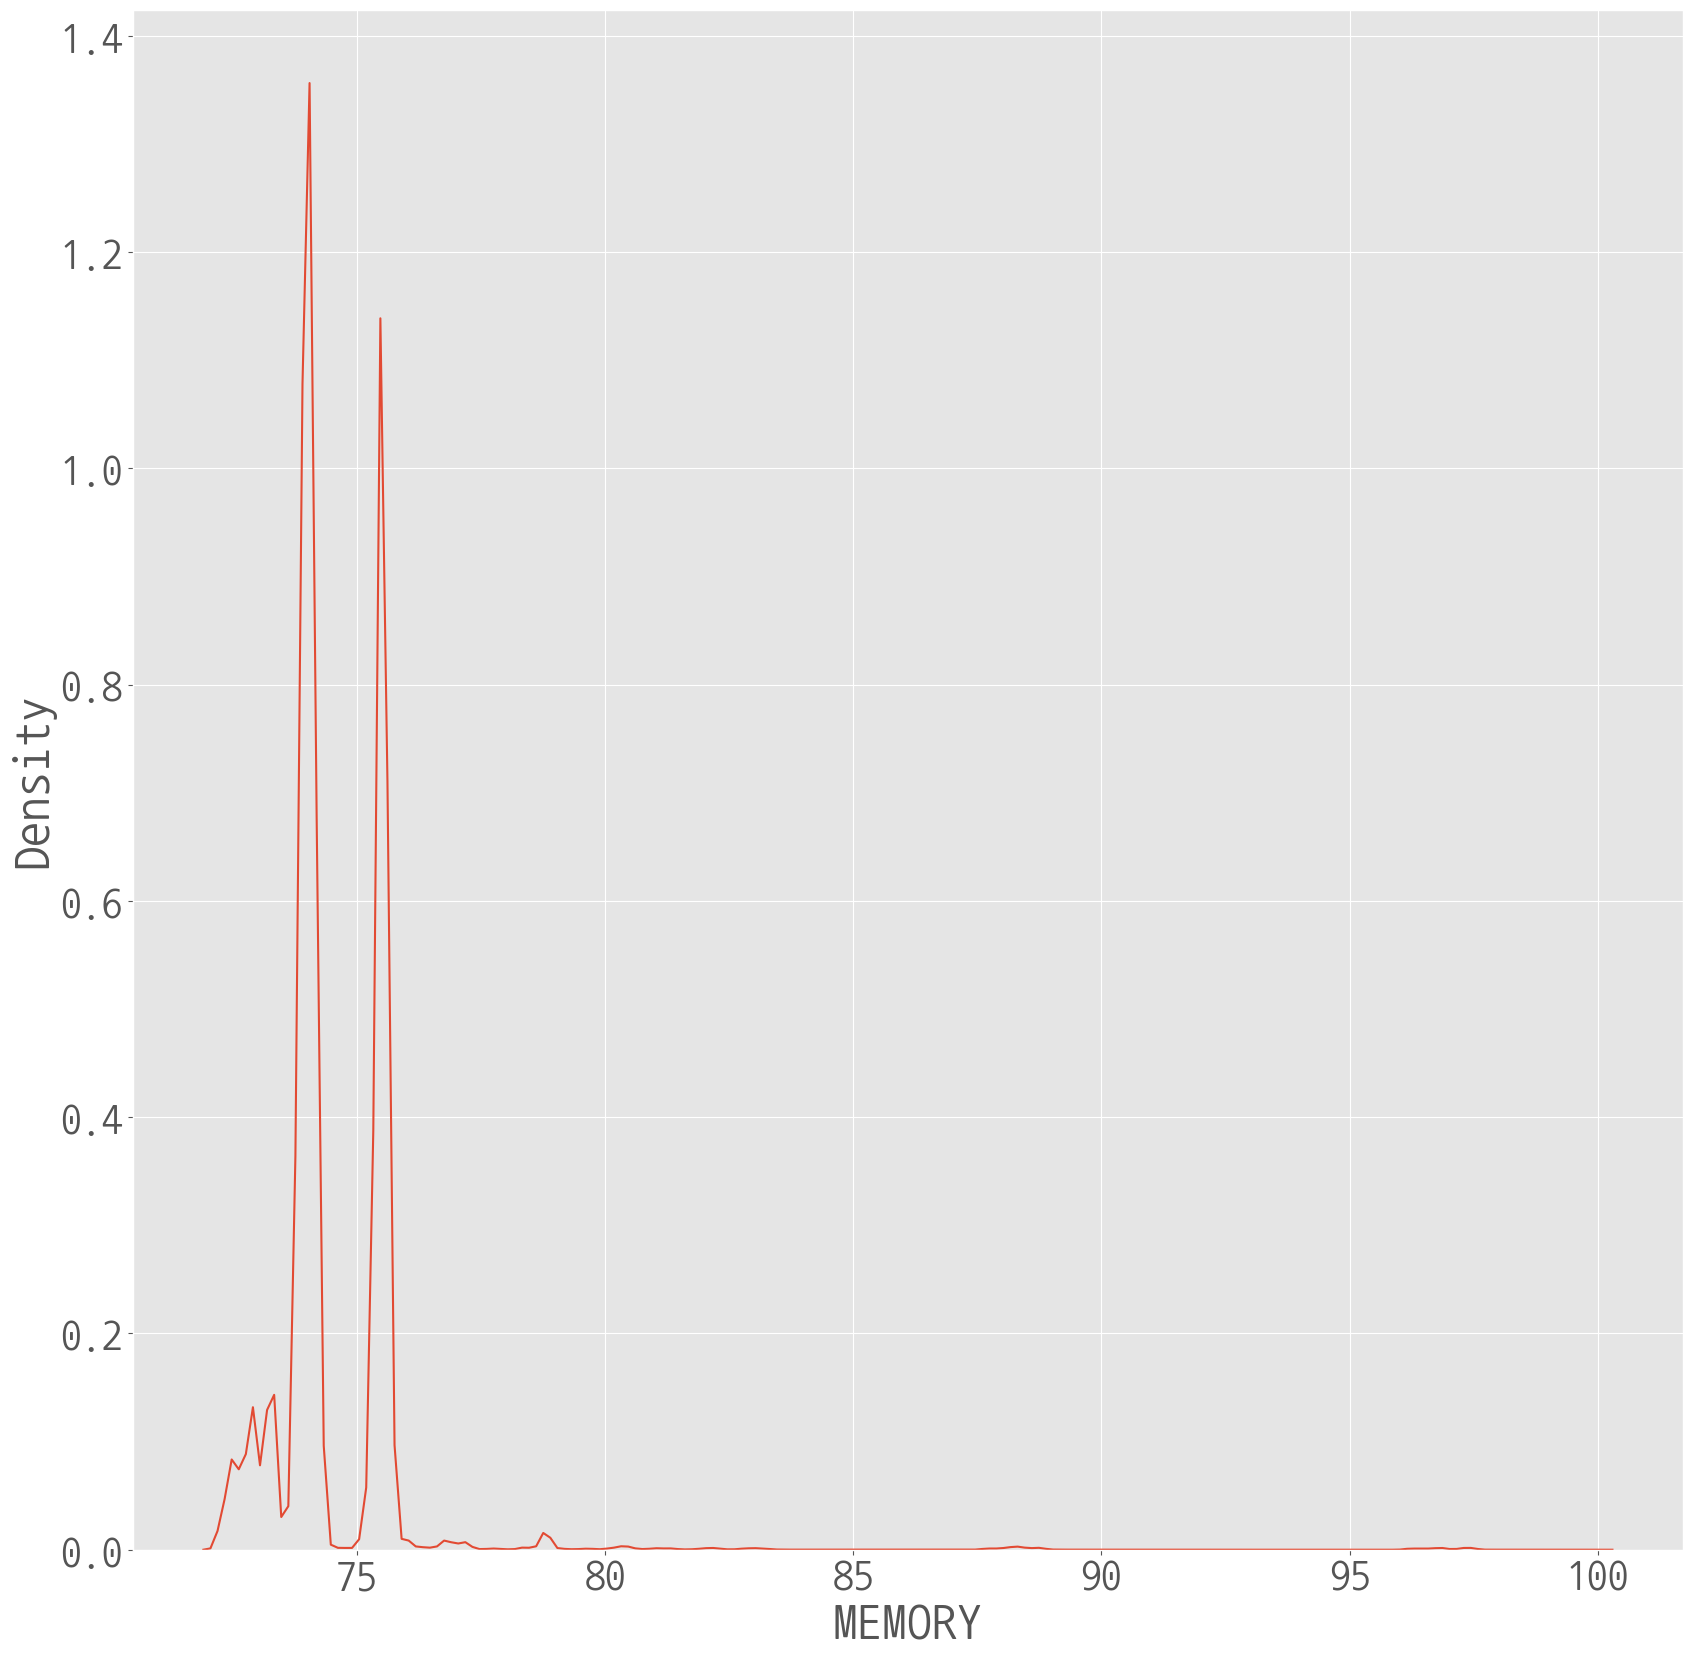